In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import re

# Ensure you have downloaded the NLTK stopwords if you haven't already
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Robert's Rebellion also known as The War of the usurper marked a significant revolt against House Targaryen that took place about 17 years before the war of the five Kings for almost a year the Seven Kingdoms bore witness to this Monumental battle culminating in the eclipse of the targaryan Dynasty and the rise of Robert baran's reign in this video we will be covering the complete story of Robert's Rebellion from the birth of rhaegar targar to the Mad King's death and if you like everything rel
['roberts', 'rebellion', 'also', 'known', 'war', 'usurper', 'marked', 'significant', 'revolt', 'house', 'targaryen', 'took', 'place', '17', 'years', 'war', 'five', 'kings', 'almost', 'year', 'seven', 'kingdoms', 'bore', 'witness', 'monumental', 'battle', 'culminating', 'eclipse', 'targaryan', 'dynasty', 'rise', 'robert', 'barans', 'reign', 'video', 'covering', 'complete', 'story', 'roberts', 'rebellion', 'birth', 'rhaegar', 'targar', 'mad', 'kings', 'death', 'like', 'everything', 'related', 'ga

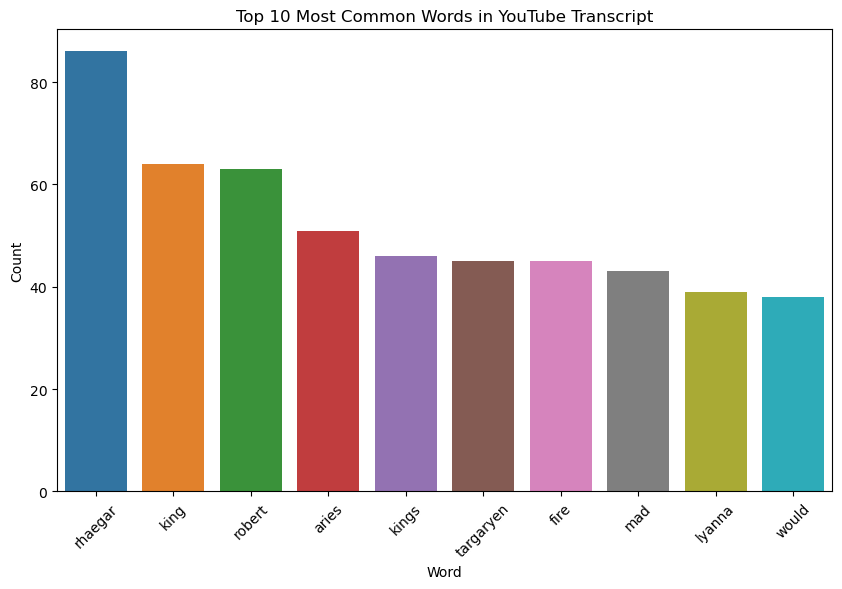

In [18]:


# Function to read and process the transcript file
def read_and_process_transcript(file_path):
    if os.path.exists(file_path):
        # Read the file content
        with open(file_path, 'r', encoding='utf-8') as file:
            transcript = file.read()

        # Display the first few lines of the transcript
        print(transcript[:500])

        # Convert text to lowercase
        transcript = transcript.lower()

        # Remove punctuation and special characters
        transcript = re.sub(r'[^\w\s]', '', transcript)

        # Tokenize the text into words
        words = transcript.split()

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words]

        # Display the first few filtered words
        print(filtered_words[:50])

        # Count word frequencies
        word_counts = Counter(filtered_words)

        # Convert the word counts to a DataFrame
        word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

        # Sort the DataFrame by count in descending order
        word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

        # Display the top 10 most common words
        print(word_counts_df.head(10))

        # Plot the top 10 most common words
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Word', y='Count', data=word_counts_df.head(10))
        plt.xticks(rotation=45)
        plt.title('Top 10 Most Common Words in YouTube Transcript')
        plt.show()
    else:
        print(f"The file at path {file_path} does not exist.")
        return None

# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Construct the file path relative to the notebook's directory
file_path = os.path.join(notebook_dir, '../data/got_transcription.txt')

# Call the function to read and process the transcript
read_and_process_transcript(file_path)
